In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd '/content/gdrive/MyDrive/DSF_Project'

/content/gdrive/.shortcut-targets-by-id/1qNkzeDbL29vjwuLywM-CUmFm5clyP7AA/DSF_Project


In [3]:
!ls

Airports_Weather_2018_Final.csv    Flight_Delay_2018
Airports_Weather_2019_Final.csv    Model_Training.ipynb
Dataset_Generation_2019.ipynb	   Preprocessed_Flight_Delay.csv
Delay_With_Weather_2018-2019.csv   Project_Proposal.gdoc
Delay_With_Weather_2018_Final.csv  Research_Papers
Delay_With_Weather_2019_Final.csv  trial.jpg
DSF-Project.ipynb		   XGboost_Flight_1.sav
Extras				   XGboost_Flight_2.sav
Flight-Analysis.ipynb		   XGboost_Flight_3.sav


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
airDelayDf = pd.read_csv("/content/gdrive/MyDrive/DSF_Project/Delay_With_Weather_2018-2019.csv")

In [6]:
airDelayDf.head()

,MONTH,DAY_OF_MONTH,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST,DEST_STATE_NM,CRS_DEP_TIME,DEP_TIME,DEP_DELAY_NEW,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY_NEW,ARR_TIME_BLK,CANCELLED,DIVERTED,TMAX,TMIN,PRCP,SNOW,SNWD,AWND,WT01,WT08,WT02,WT04,WT09,WT03,WT06,WT05,WT07,WT10,TMAX_Dest,TMIN_Dest,PRCP_Dest,SNOW_Dest,SNWD_Dest,AWND_Dest,WT01_Dest,WT08_Dest,WT02_Dest,WT04_Dest,WT09_Dest,WT03_Dest,WT06_Dest,WT05_Dest,WT07_Dest,WT10_Dest
0,1,14,9E,N315PQ,3469,11433,DTW,Michigan,14100,1410005,PHL,Pennsylvania,845,840.0,0.0,0800-0859,17.0,857.0,1004.0,3.0,1034,1007.0,0.0,1000-1059,0.0,0.0,-66.0,-132.0,0.0,0.0,30.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-27.0,-99.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2,9E,N600LR,3470,10821,BWI,Maryland,11433,1143302,DTW,Michigan,1945,1957.0,12.0,1900-1959,34.0,2031.0,2135.0,6.0,2125,2141.0,16.0,2100-2159,0.0,0.0,-43.0,-116.0,0.0,0.0,0.0,44.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-105.0,-177.0,0.0,0.0,150.0,68.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,2,9E,N600LR,3470,11433,DTW,Michigan,10821,1082106,BWI,Maryland,1730,1725.0,0.0,1700-1759,18.0,1743.0,1852.0,7.0,1909,1859.0,0.0,1900-1959,0.0,0.0,-105.0,-177.0,0.0,0.0,150.0,68.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-43.0,-116.0,0.0,0.0,0.0,44.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,2,9E,N326PQ,3471,10721,BOS,Massachusetts,12478,1247805,JFK,New York,1925,1915.0,0.0,1900-1959,27.0,1942.0,2027.0,7.0,2102,2034.0,0.0,2100-2159,0.0,0.0,-71.0,-155.0,0.0,0.0,0.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-32.0,-105.0,0.0,0.0,0.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,3,9E,N934XJ,3471,10721,BOS,Massachusetts,12478,1247805,JFK,New York,1925,1921.0,0.0,1900-1959,25.0,1946.0,2033.0,31.0,2055,2104.0,9.0,2000-2059,0.0,0.0,-16.0,-88.0,0.0,0.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-21.0,-110.0,0.0,0.0,0.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
features =  ['MONTH', 'DAY_OF_MONTH', 'OP_UNIQUE_CARRIER', 'TAIL_NUM','OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_ID', 'ORIGIN',
      'ORIGIN_STATE_NM','DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID', 'DEST', 'DEST_STATE_NM', 'CRS_DEP_TIME',
      'DEP_TIME', 'DEP_DELAY_NEW', 'DEP_TIME_BLK', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 
      'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY_NEW', 'ARR_TIME_BLK', 'CANCELLED', 'DIVERTED']
      
      # 'TMAX', 'TMIN', 'PRCP', 'SNOW', 'SNWD', 'AWND', 
      # 'WT01', 'WT08', 'WT02', 'WT04','WT09', 'WT03', 'WT06', 'WT05', 'WT07', 'WT10', 'TMAX_Dest', 'TMIN_Dest', 'PRCP_Dest', 
      #  'SNOW_Dest', 'SNWD_Dest', 'AWND_Dest', 'WT01_Dest', 'WT08_Dest', 'WT02_Dest', 'WT04_Dest',
      #  'WT09_Dest', 'WT03_Dest', 'WT06_Dest', 'WT05_Dest', 'WT07_Dest', 'WT10_Dest']"""

<h1> Question 1) Is there any seasonality in flight delay across the year? Does flight delay increase during particular months?

In [8]:
df_1 = airDelayDf[features]

In [9]:
df_1_groupbyMonth = df_1[["MONTH","DEP_DELAY_NEW","ARR_DELAY_NEW"]].groupby("MONTH").sum()
df_1_groupbyMonth["MONTH"] = df_1_groupbyMonth.index

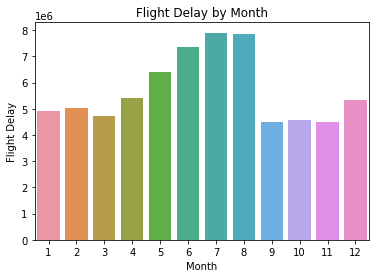

In [11]:
sns.barplot(x ="MONTH" ,y = "ARR_DELAY_NEW",data = df_1_groupbyMonth)
plt.title("Flight Delay by Month")
plt.ylabel("Flight Delay")
plt.xlabel("Month")
plt.savefig("fig1.jpg")

Air travel also increases during the summer months, generally from around Memorial Day through Labor Day. Many Americans take these months to spend vacations with their families, and many of us enjoy traveling to the same destinations, which could have an effect on your air travel experience.

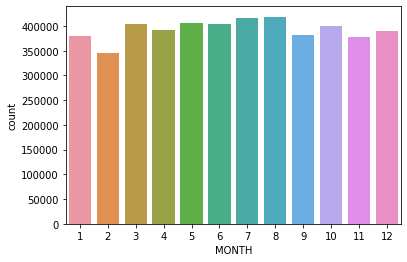

In [14]:
sns.countplot(data=df_1, x="MONTH")

<h1> Question 2)

In [46]:
delarr1 = df_1[(df_1["DEP_DELAY_NEW"] > 0) & (df_1["ARR_DELAY_NEW"]==0.0)]
delarr2 = df_1[(df_1["DEP_DELAY_NEW"] > df_1["ARR_DELAY_NEW"]) & (df_1["ARR_DELAY_NEW"]>0.0)]
delarr3 = df_1[(df_1["ARR_DELAY_NEW"] > df_1["DEP_DELAY_NEW"]) & (df_1["DEP_DELAY_NEW"]>0.0)]
delarr4 = df_1[(df_1["ARR_DELAY_NEW"] > 0.0) & (df_1["DEP_DELAY_NEW"]==0.0)]
delarr5 = df_1[(df_1["DEP_DELAY_NEW"] == 0.0) & (df_1["ARR_DELAY_NEW"]==0.0)]

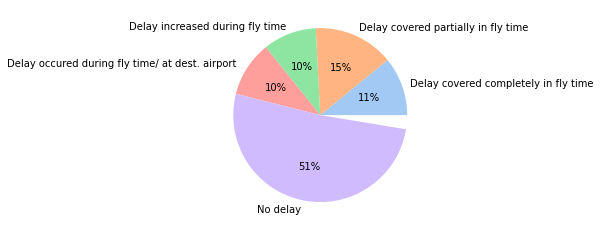

<Figure size 432x288 with 0 Axes>

In [49]:
n = df_1.shape[0]
#define data
data = [delarr1.shape[0]/n, delarr2.shape[0]/n, delarr3.shape[0]/n, delarr4.shape[0]/n, delarr5.shape[0]/n]
labels = ['Delay covered completely in fly time', 'Delay covered partially in fly time', 'Delay increased during fly time', 'Delay occured during fly time/ at dest. airport ', 'No delay']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()
plt.savefig("fig5.jpg")

<h1>Question 3) 

In [16]:
airDelayDf1 = pd.read_csv("/content/gdrive/MyDrive/DSF_Project/Delay_With_Weather_2018_Final.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (48) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [17]:
airDelayDf1 = airDelayDf1[["QUARTER","MONTH","DAY_OF_MONTH","DAY_OF_WEEK","DEP_TIME","DEP_DELAY"]]

In [18]:
airDelayDf1["TIME_OF_DAY"] = airDelayDf1["DEP_TIME"]//100

In [35]:
airDelayDf1["DEP_DELAY_NEW_LOG"] = np.log10(airDelayDf1["DEP_DELAY"])

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [37]:
#airDelayDf1.dropna(inplace=True)
airDelayDf1.isnull().sum()

QUARTER              0
MONTH                0
DAY_OF_MONTH         0
DAY_OF_WEEK          0
DEP_TIME             0
DEP_DELAY            0
TIME_OF_DAY          0
DEP_DELAY_NEW_LOG    0
dtype: int64

In [38]:
airDelayDf1.astype({"DEP_DELAY_NEW_LOG":"int32"}).dtypes

ValueError: ignored

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


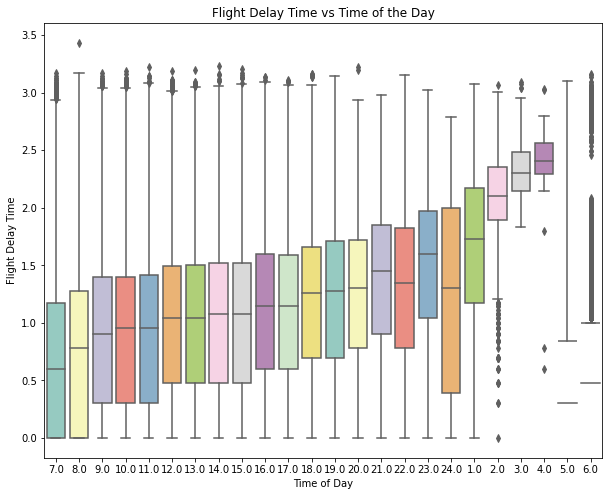

In [40]:
plt.figure(figsize = (10,8))
ax = sns.boxplot(x="TIME_OF_DAY", y="DEP_DELAY_NEW_LOG", data=airDelayDf1, palette="Set3",order=[7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,1.0,2.0,3.0,4.0,5.0,6.0])
plt.title("Flight Delay Time vs Time of the Day")
plt.xlabel("Time of Day")
plt.ylabel("Flight Delay Time")
plt.savefig("fig2.jpg")

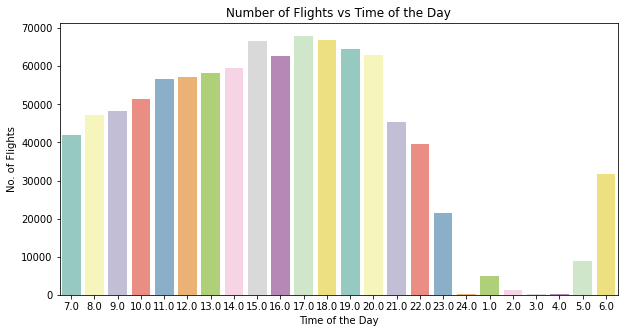

In [45]:
plt.figure(figsize = (10,5))
sns.countplot(data=airDelayDf1, x="TIME_OF_DAY",order = [7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,1.0,2.0,3.0,4.0,5.0,6.0],palette="Set3")
plt.title("Number of Flights vs Time of the Day")
plt.xlabel("Time of the Day")
plt.ylabel("No. of Flights")
plt.savefig("fig3.jpg")

The reason is that most airlines schedule relatively tightly in order to get the greatest use of aircraft and flight crew. The result is that delays that occur early in the day typically accumulate and propagate forward, landing on the last flight of the day.

Airline schedulers are not oblivious to this fact, however. Further, the airline as a whole is motivated to achieve a good on-time record since this is very public data. So many airlines pad the flight schedule and the minimum turn times (time an aircraft is on the ground between arriving at the gate and pushing back) for flights later in the day.

Padding or no, it is nearly impossible to recover from a significant delay (weather, late inbound, maintenance, etc.) without affecting the schedule later in the day. In the worse-case scenario -- say, a storm in the airlines major hub -- it can take two or three days to get aircraft, crew and passengers all sorted out again.

In [ ]:
import datetime, warnings, scipy 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import ConnectionPatch
from collections import OrderedDict
from matplotlib.gridspec import GridSpec
#from mpl_toolkits.basemap import Basemap
from sklearn import metrics, linear_model
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from scipy.optimize import curve_fit
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"
pd.options.display.max_columns = 50
%matplotlib inline
warnings.filterwarnings("ignore")

In [ ]:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}
#_______________________________________________________________
# Creation of a dataframe with statitical infos on each airline:
global_stats = df2['DEP_DELAY_NEW'].groupby(df2['OP_UNIQUE_CARRIER']).apply(get_stats).unstack()
global_stats = global_stats.sort_values('count')
global_stats

,min,max,count,mean
OP_UNIQUE_CARRIER,,,,
G4,0.0,1044.0,1770.0,18.820904
VX,0.0,520.0,12029.0,11.519910
EV,0.0,1751.0,15201.0,21.889547
HA,0.0,1700.0,16133.0,13.269138
OH,0.0,1338.0,17409.0,13.381297
MQ,0.0,2672.0,27527.0,15.005340
YV,0.0,1487.0,43018.0,15.399647
9E,0.0,1163.0,50638.0,17.500533
F9,0.0,1022.0,84627.0,22.128777


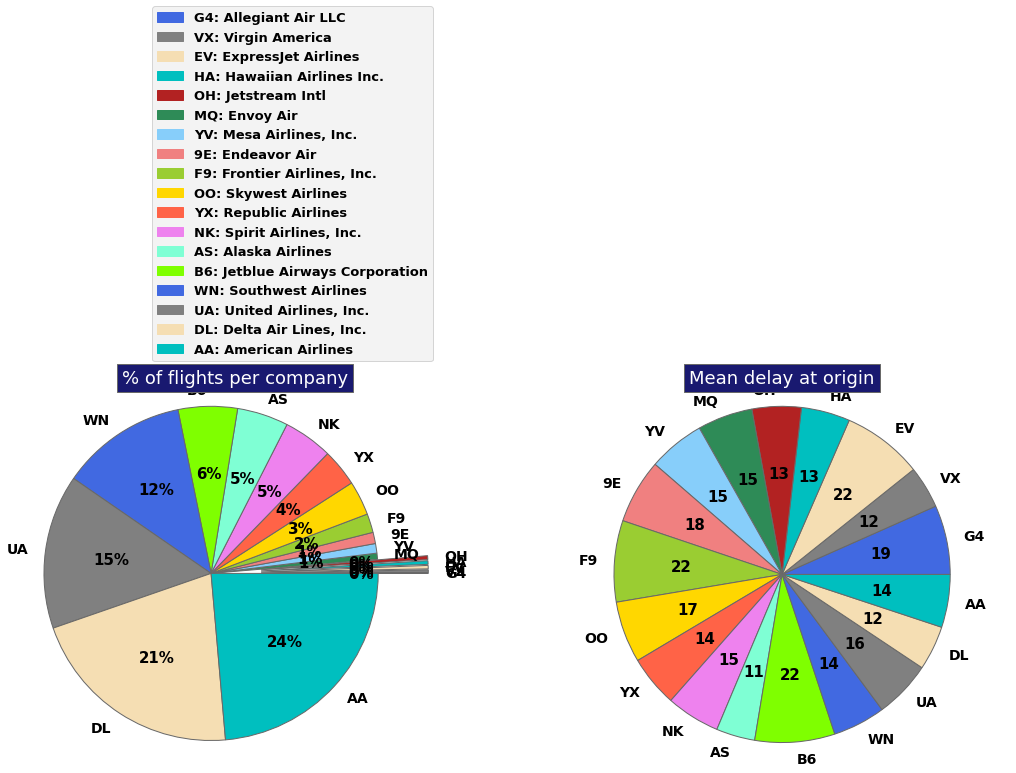

In [ ]:
abbr_companies = airDelayDf["OP_UNIQUE_CARRIER"].unique()
font = {'family' : 'normal', 'weight' : 'bold', 'size'   : 15}
mpl.rc('font', **font)
import matplotlib.patches as mpatches
#__________________________________________________________________
# I extract a subset of columns and redefine the airlines labeling 
df2 = df2.loc[:, ['OP_UNIQUE_CARRIER', 'DEP_DELAY_NEW']]
#df2['OP_UNIQUE_CARRIER'] = df2['OP_UNIQUE_CARRIER'].replace(abbr_companies)
#________________________________________________________________________
colors = ['royalblue', 'grey', 'wheat', 'c', 'firebrick', 'seagreen', 'lightskyblue',
          'lightcoral', 'yellowgreen', 'gold', 'tomato', 'violet', 'aquamarine', 'chartreuse']
#___________________________________
fig = plt.figure(1, figsize=(16,15))
gs=GridSpec(2,2)             
ax1=fig.add_subplot(gs[0,0]) 
ax2=fig.add_subplot(gs[0,1]) 
#ax3=fig.add_subplot(gs[1,:]) 
#------------------------------
# Pie chart nº1: nb of flights
#------------------------------
labels = [s for s in  global_stats.index]
sizes  = global_stats['count'].values
explode = [0.3 if sizes[i] < 20000 else 0.0 for i in range(len(abbr_companies))]
patches, texts, autotexts = ax1.pie(sizes, explode = explode,
                                labels=labels, colors = colors,  autopct='%1.0f%%',
                                shadow=False, startangle=0)
for i in range(len(abbr_companies)): 
    texts[i].set_fontsize(14)
ax1.axis('equal')
ax1.set_title('% of flights per company', bbox={'facecolor':'midnightblue', 'pad':5},
              color = 'w',fontsize=18)
#_______________________________________________
# I set the legend: abreviation -> airline name
comp_handler = []
for i in range(len(abbr_companies)):
    comp_handler.append(mpatches.Patch(color=colors[i%14],
            label = global_stats.index[i] + ': ' + airline[global_stats.index[i]]))
ax1.legend(handles=comp_handler, bbox_to_anchor=(0.2, 0.9), 
           fontsize = 13, bbox_transform=plt.gcf().transFigure)
#----------------------------------------
# Pie chart nº2: mean delay at departure
#----------------------------------------
sizes  = global_stats['mean'].values
sizes  = [max(s,0) for s in sizes]
explode = [0.0 if sizes[i] < 20000 else 0.01 for i in range(len(abbr_companies))]
patches, texts, autotexts = ax2.pie(sizes, explode = explode, labels = labels,
                                colors = colors, shadow=False, startangle=0,
                                autopct = lambda p :  '{:.0f}'.format(p * sum(sizes) / 100))
for i in range(len(abbr_companies)): 
    texts[i].set_fontsize(14)
ax2.axis('equal')
ax2.set_title('Mean delay at origin', bbox={'facecolor':'midnightblue', 'pad':5},
              color='w', fontsize=18)
# #------------------------------------------------------
# # striplot with all the values reported for the delays
# #___________________________________________________________________
# # I redefine the colors for correspondance with the pie charts
# colors = ['firebrick', 'gold', 'lightcoral', 'aquamarine', 'c', 'yellowgreen', 'grey',
#           'seagreen', 'tomato', 'violet', 'wheat', 'chartreuse', 'lightskyblue', 'royalblue']
# #___________________________________________________________________
# ax3 = sns.stripplot(y="OP_UNIQUE_CARRIER", x="DEP_DELAY_NEW", size = 4, palette = colors,
#                     data=df2, linewidth = 0.5,  jitter=True)
# plt.setp(ax3.get_xticklabels(), fontsize=14)
# plt.setp(ax3.get_yticklabels(), fontsize=14)
# ax3.set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*[int(y) for y in divmod(x,60)])
#                          for x in ax3.get_xticks()])
# plt.xlabel('Departure delay', fontsize=18, bbox={'facecolor':'midnightblue', 'pad':5},
#            color='w', labelpad=20)
# ax3.yaxis.label.set_visible(False)
# #________________________
# plt.tight_layout(w_pad=3) 
plt.savefig("trial.jpg")

In [ ]:
airDelayDf.head

,MONTH,DAY_OF_MONTH,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST,DEST_STATE_NM,CRS_DEP_TIME,DEP_TIME,DEP_DELAY_NEW,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY_NEW,ARR_TIME_BLK,CANCELLED,...,WT08,WT02,WT04,WT09,WT03,WT06,WT05,WT07,WT10,TMAX_Dest,TMIN_Dest,PRCP_Dest,SNOW_Dest,SNWD_Dest,AWND_Dest,WT01_Dest,WT08_Dest,WT02_Dest,WT04_Dest,WT09_Dest,WT03_Dest,WT06_Dest,WT05_Dest,WT07_Dest,WT10_Dest
0,1,14,9E,N315PQ,3469,11433,DTW,Michigan,14100,1410005,PHL,Pennsylvania,845,840.0,0.0,0800-0859,17.0,857.0,1004.0,3.0,1034,1007.0,0.0,1000-1059,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-27.0,-99.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2,9E,N600LR,3470,10821,BWI,Maryland,11433,1143302,DTW,Michigan,1945,1957.0,12.0,1900-1959,34.0,2031.0,2135.0,6.0,2125,2141.0,16.0,2100-2159,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-105.0,-177.0,0.0,0.0,150.0,68.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,2,9E,N600LR,3470,11433,DTW,Michigan,10821,1082106,BWI,Maryland,1730,1725.0,0.0,1700-1759,18.0,1743.0,1852.0,7.0,1909,1859.0,0.0,1900-1959,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-43.0,-116.0,0.0,0.0,0.0,44.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,2,9E,N326PQ,3471,10721,BOS,Massachusetts,12478,1247805,JFK,New York,1925,1915.0,0.0,1900-1959,27.0,1942.0,2027.0,7.0,2102,2034.0,0.0,2100-2159,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-32.0,-105.0,0.0,0.0,0.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,3,9E,N934XJ,3471,10721,BOS,Massachusetts,12478,1247805,JFK,New York,1925,1921.0,0.0,1900-1959,25.0,1946.0,2033.0,31.0,2055,2104.0,9.0,2000-2059,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-21.0,-110.0,0.0,0.0,0.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
airDelayDf["OP_UNIQUE_CARRIER"].nunique()

18

In [ ]:
global_stats.index[0]

'G4'

In [ ]:
airDelayDf1.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,...,WT03,WT04,WT05,WT06,WT07,WT08,WT09,WT10,TMAX_Dest,TMIN_Dest,PRCP_Dest,SNOW_Dest,SNWD_Dest,AWND_Dest,WSF5_Dest,WT01_Dest,WT02_Dest,WT03_Dest,WT04_Dest,WT05_Dest,WT06_Dest,WT07_Dest,WT08_Dest,WT09_Dest,WT10_Dest
0,2018,1,1,14,7,2018-01-14,9E,20363,9E,N315PQ,3469,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,14100,1410005,34100,PHL,"Philadelphia, PA",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-27.0,-99.0,0.0,0.0,0.0,54.0,134.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2018,1,1,2,2,2018-01-02,9E,20363,9E,N600LR,3470,10821,1082106,30852,BWI,"Baltimore, MD",MD,24,Maryland,35,11433,1143302,31295,DTW,"Detroit, MI",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-105.0,-177.0,0.0,0.0,150.0,68.0,116.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2018,1,1,2,2,2018-01-02,9E,20363,9E,N600LR,3470,11433,1143302,31295,DTW,"Detroit, MI",MI,26,Michigan,43,10821,1082106,30852,BWI,"Baltimore, MD",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-43.0,-116.0,0.0,0.0,0.0,44.0,107.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2018,1,1,2,2,2018-01-02,9E,20363,9E,N326PQ,3471,10721,1072102,30721,BOS,"Boston, MA",MA,25,Massachusetts,13,12478,1247805,31703,JFK,"New York, NY",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-32.0,-105.0,0.0,0.0,0.0,70.0,130.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2018,1,1,3,3,2018-01-03,9E,20363,9E,N934XJ,3471,10721,1072102,30721,BOS,"Boston, MA",MA,25,Massachusetts,13,12478,1247805,31703,JFK,"New York, NY",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-21.0,-110.0,0.0,0.0,0.0,37.0,103.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
airline = {"ZW" : "Air Wisconsin",
"AS" : "Alaska Airlines",
"G4" : "Allegiant Air LLC", 
"AA" : "American Airlines",
"C5" : "Champlain Air", 
"CP": 	"Compass Airlines", 
"DL": 	"Delta Air Lines, Inc.", 
"EM": "Empire Airline", 
"9E": "Endeavor Air", 
"MQ": "Envoy Air", 
"EV": 	"ExpressJet Airlines", 
"F9": 	"Frontier Airlines, Inc.", 
"G7": 	"GoJet Airlines", 
"HA": 	"Hawaiian Airlines Inc.", 
"QX":	 	"Horizon Air", 
"B6":	 	"Jetblue Airways Corporation", 
"OH":	 	"Jetstream Intl", 
"YV":	 	"Mesa Airlines, Inc.", 
"KS":	 	"Penair", 
"PT":	 	"Piedmont Airlines", 
"YX":	 	"Republic Airlines", 
"OO": 	"Skywest Airlines", 
"WN":	 	"Southwest Airlines", 
"NK": 	"Spirit Airlines, Inc.", 
"AX":	 	"Trans State", 
"UA":	 	"United Airlines, Inc.",
"VX": "Virgin America"
} 

In [3]:
file = "/content/drive/MyDrive/DSF_Project/Result_Table.xlsx"
import pandas as pd
df = pd.read_excel(file)
df.to_latex("output.tex")